In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Mall_Customers_clustering.csv')

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df1=df.drop(columns=["CustomerID","Gender","Age"],axis=1)

In [7]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


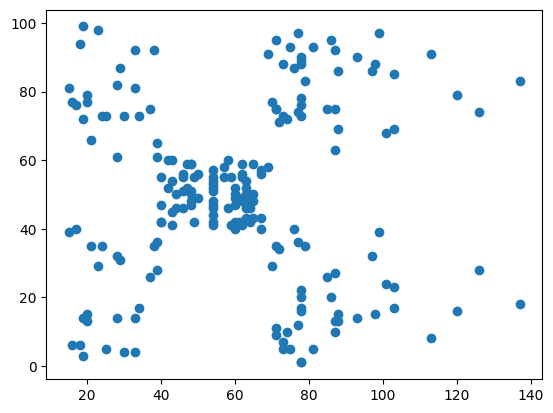

In [8]:
plt.scatter(df1["Annual Income (k$)"],df["Spending Score (1-100)"])

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [11]:
wcss

[269981.28,
 186194.37333333335,
 132485.38056680158,
 73679.78903948836,
 44448.45544793371,
 37271.8862365895,
 36696.48257257449,
 25388.76002817937,
 24820.18752821253,
 21154.223310023313,
 19237.512156698453,
 16600.185369525716,
 16199.491294086032,
 13351.086186199422,
 13343.572534721188,
 12182.313644688646,
 11526.590909090908,
 9927.887301587301,
 10070.804284631491,
 8660.599196338613]

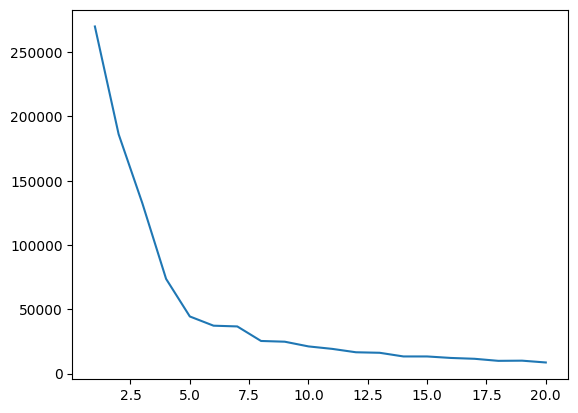

In [12]:
plt.plot(range(1,21),wcss)

In [13]:
X=df1.iloc[:,:].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)

In [14]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [15]:
X[y_means == 3,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

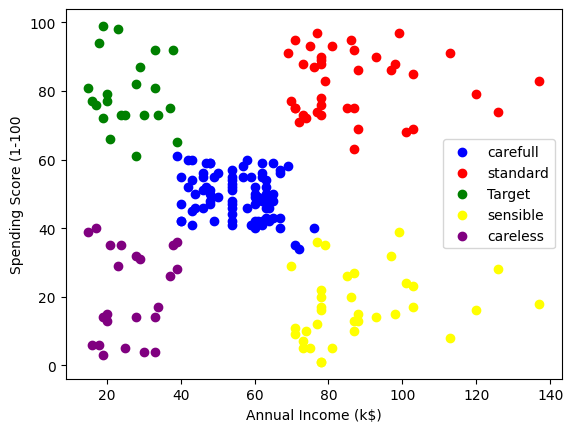

In [16]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='carefull')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='standard')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Target')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow',label='sensible')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='purple',label='careless')
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

In [17]:
df1["Target"]=y_means

In [18]:
df1

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3
